<a href="https://colab.research.google.com/github/ockayy/forecasting-Budget/blob/main/Budget_forecasting2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading and Preprocessing**

Summary Statistics:
                           timestamp  monthly_income  daily_spending  \
count                           3650     3650.000000     3650.000000   
mean   2023-07-02 00:00:00.000000256        0.416667        0.124639   
min              2023-01-01 00:00:00        0.000000        0.000000   
25%              2023-04-02 00:00:00        0.166667        0.005603   
50%              2023-07-02 00:00:00        0.333333        0.047059   
75%              2023-10-01 00:00:00        0.583333        0.194526   
max              2023-12-31 00:00:00        1.000000        1.000000   
std                              NaN        0.349651        0.166042   

       saving_goal  saving_achieved  inflation_rate  cumulative_spend  \
count  3650.000000      3650.000000     3650.000000       3650.000000   
mean      0.484855         0.240437        0.309203          0.257243   
min       0.000000         0.000000        0.268900          0.000000   
25%       0.284601         0.000000    

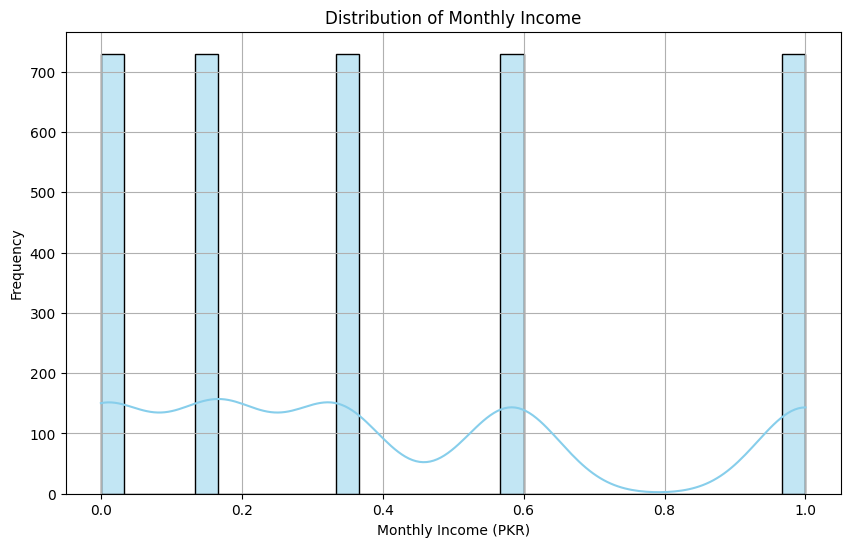

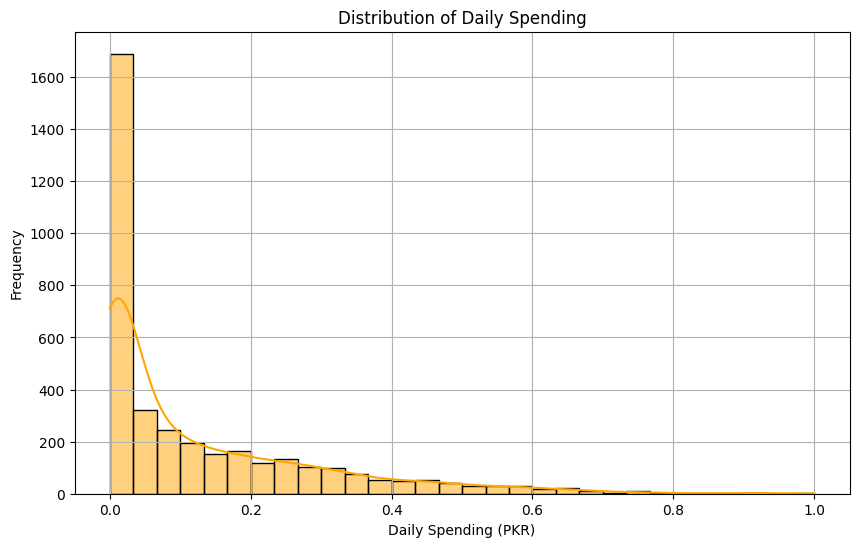

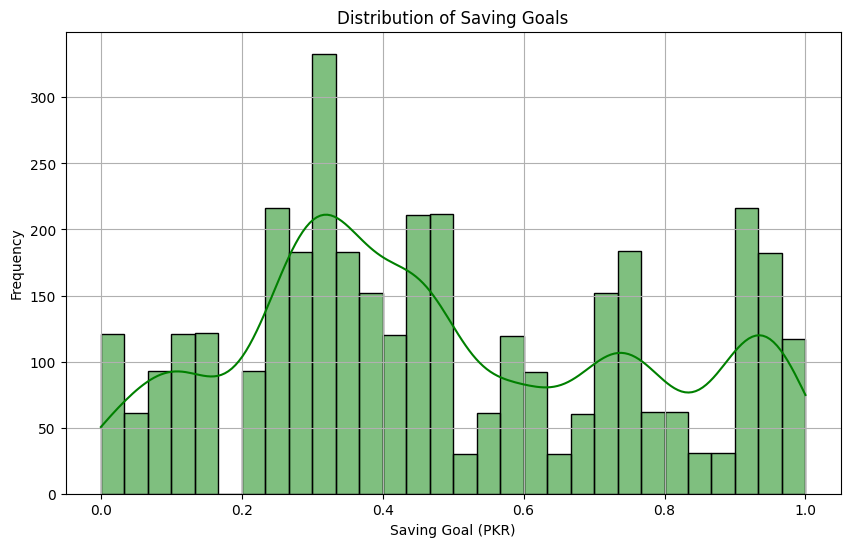

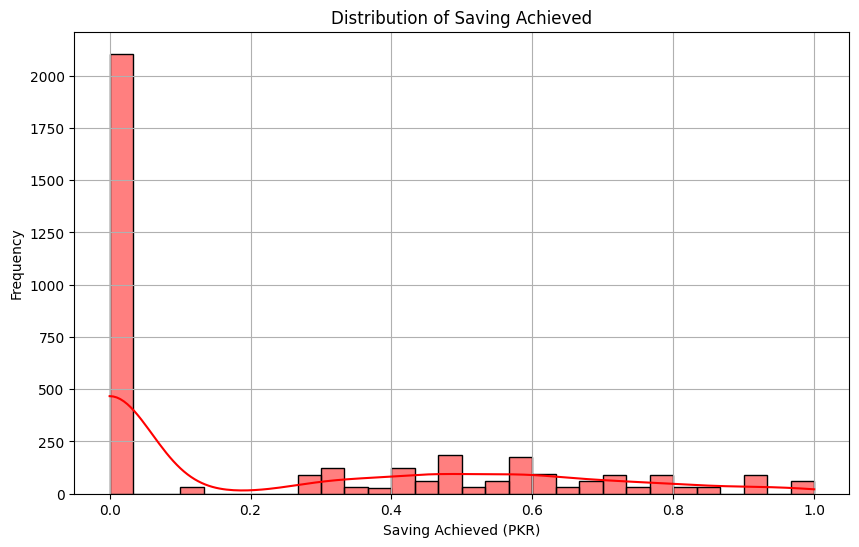

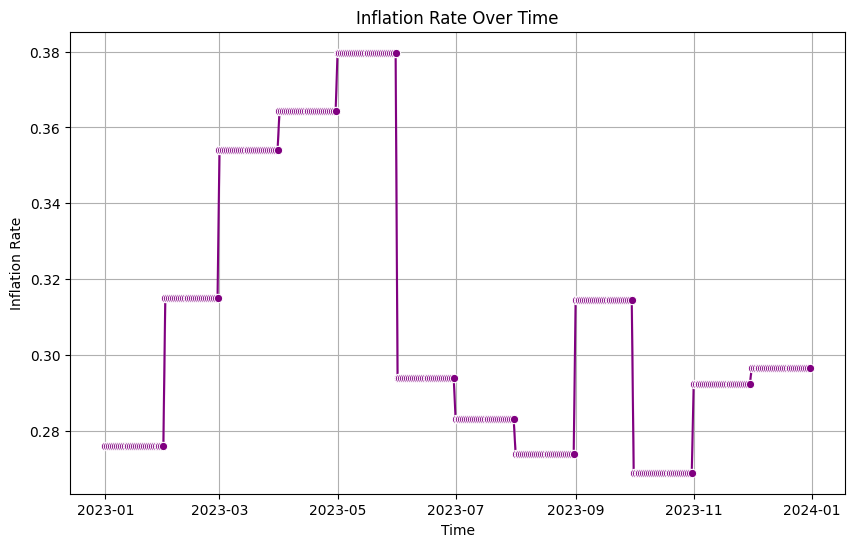

<ipython-input-5-4affeafa8ca0>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pattern_type', data=df, palette='Set2')


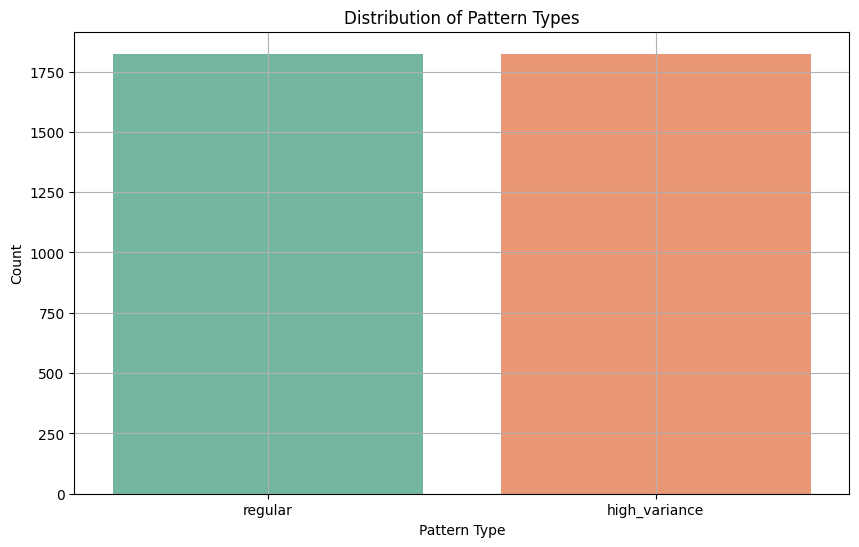

ValueError: could not convert string to float: 'regular'

<Figure size 1200x800 with 0 Axes>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset_norm.csv', parse_dates=['timestamp'])

# Summary statistics of the dataset
print("Summary Statistics:")
print(df.describe())

# Distribution of monthly income
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income (PKR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of daily spending
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_spending'], bins=30, kde=True, color='orange')
plt.title('Distribution of Daily Spending')
plt.xlabel('Daily Spending (PKR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of saving goals
plt.figure(figsize=(10, 6))
sns.histplot(df['saving_goal'], bins=30, kde=True, color='green')
plt.title('Distribution of Saving Goals')
plt.xlabel('Saving Goal (PKR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of saving achieved
plt.figure(figsize=(10, 6))
sns.histplot(df['saving_achieved'], bins=30, kde=True, color='red')
plt.title('Distribution of Saving Achieved')
plt.xlabel('Saving Achieved (PKR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of inflation rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='inflation_rate', data=df, marker='o', color='purple')
plt.title('Inflation Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()

# Distribution of pattern types
plt.figure(figsize=(10, 6))
sns.countplot(x='pattern_type', data=df, palette='Set2')
plt.title('Distribution of Pattern Types')
plt.xlabel('Pattern Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Correlation matrix to check relationships between features
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


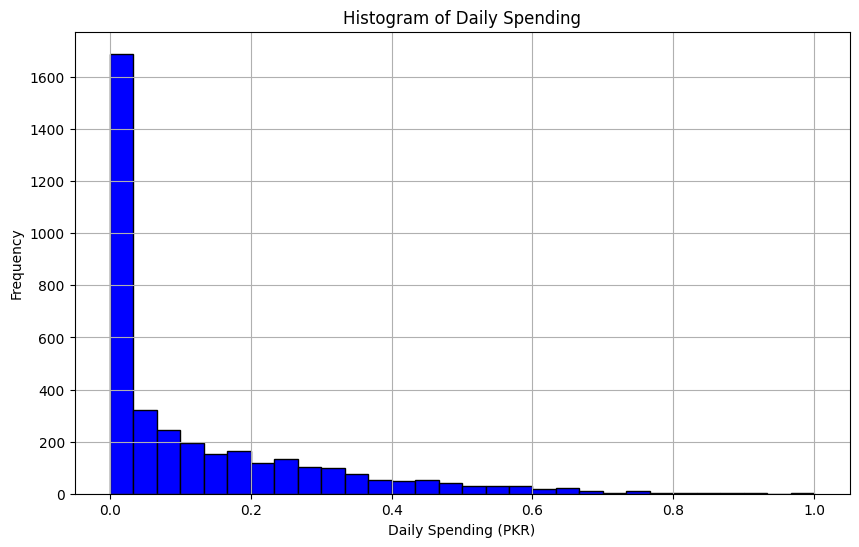

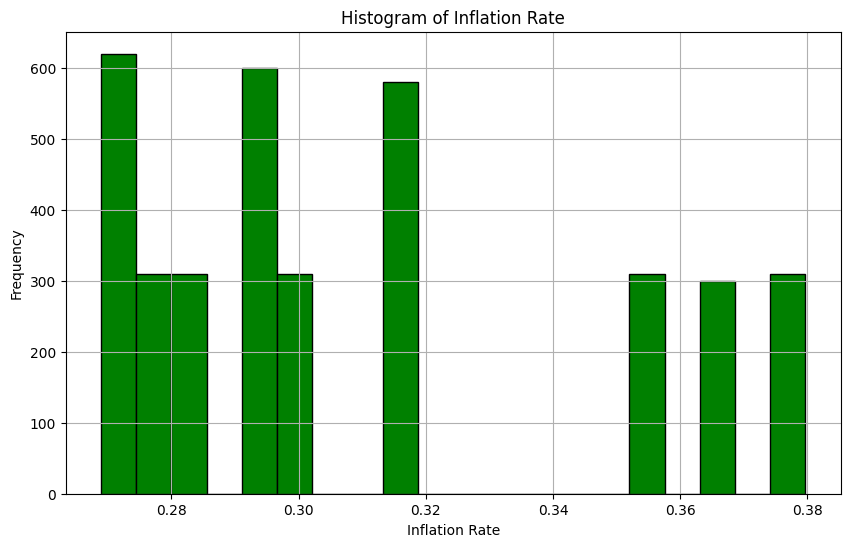

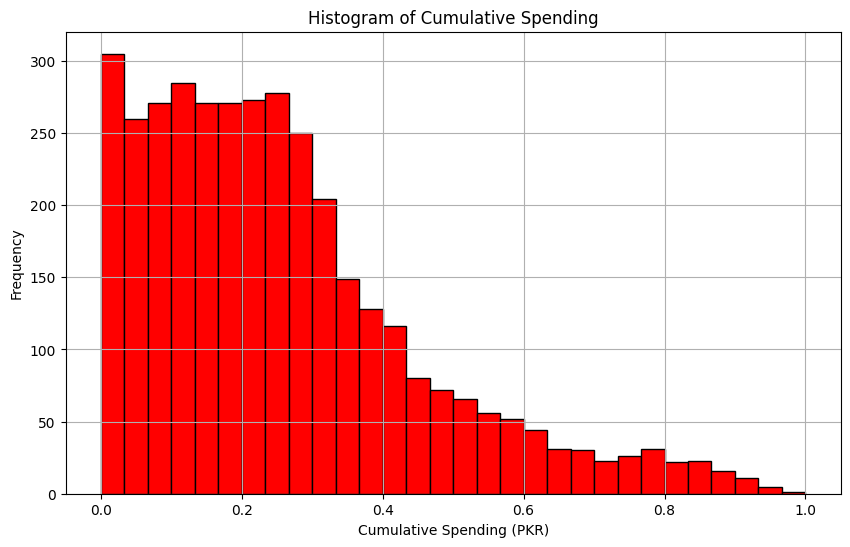

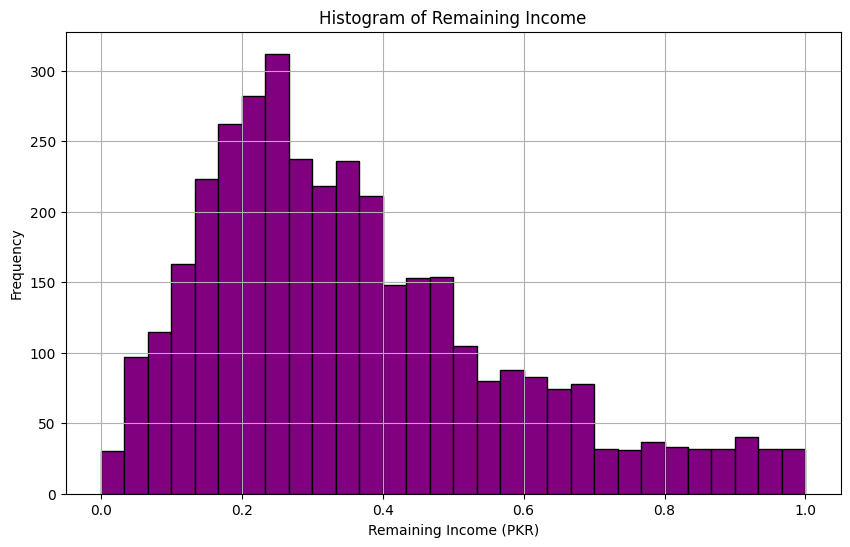

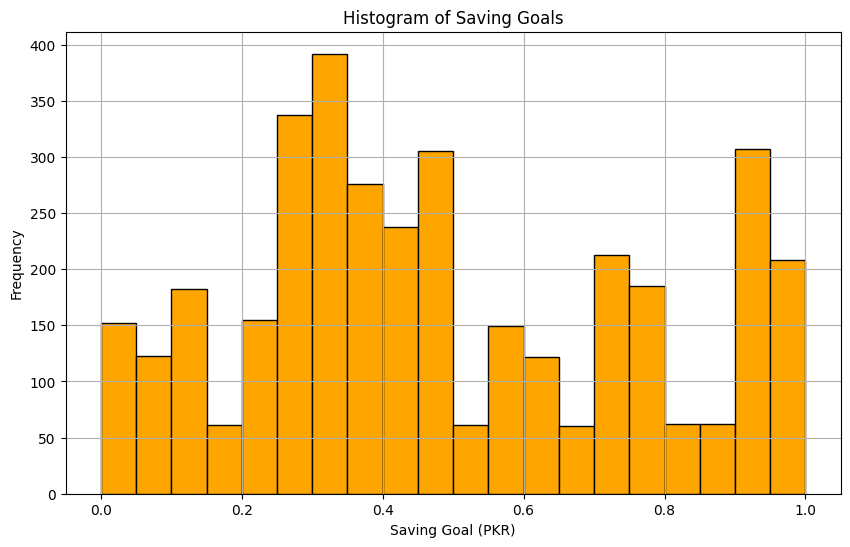

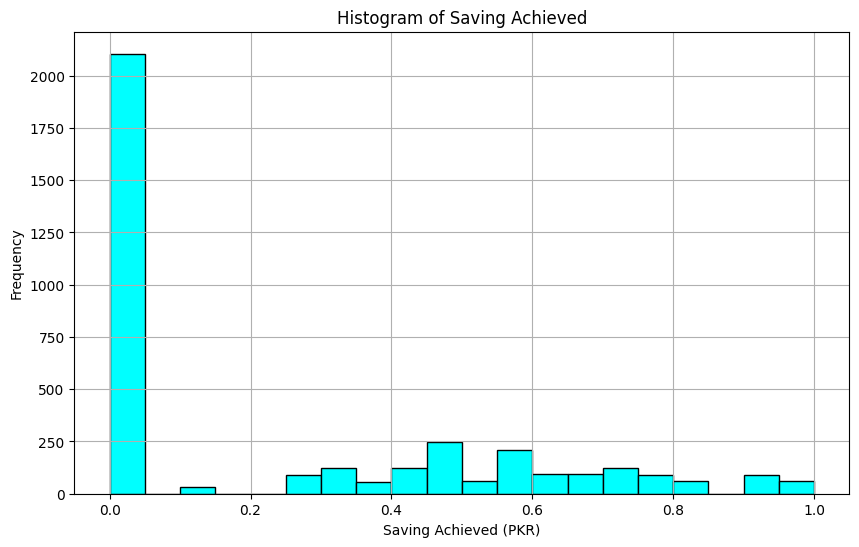

In [12]:
# Plot 1: Histogram of Daily Spending
plt.figure(figsize=(10, 6))
plt.hist(df['daily_spending'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Daily Spending (PKR)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Spending')
plt.grid(True)
plt.show()

# Plot 2: Histogram of Inflation Rate
plt.figure(figsize=(10, 6))
plt.hist(df['inflation_rate'], bins=20, color='green', edgecolor='black')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Inflation Rate')
plt.grid(True)
plt.show()

# Plot 3: Histogram of Cumulative Spending
plt.figure(figsize=(10, 6))
plt.hist(df['cumulative_spend'], bins=30, color='red', edgecolor='black')
plt.xlabel('Cumulative Spending (PKR)')
plt.ylabel('Frequency')
plt.title('Histogram of Cumulative Spending')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Remaining Income
plt.figure(figsize=(10, 6))
plt.hist(df['remaining_income'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Remaining Income (PKR)')
plt.ylabel('Frequency')
plt.title('Histogram of Remaining Income')
plt.grid(True)
plt.show()

# Plot 5: Histogram of Saving Goals
plt.figure(figsize=(10, 6))
plt.hist(df['saving_goal'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Saving Goal (PKR)')
plt.ylabel('Frequency')
plt.title('Histogram of Saving Goals')
plt.grid(True)
plt.show()

# Plot 6: Histogram of Saving Achieved
plt.figure(figsize=(10, 6))
plt.hist(df['saving_achieved'], bins=20, color='cyan', edgecolor='black')
plt.xlabel('Saving Achieved (PKR)')
plt.ylabel('Frequency')
plt.title('Histogram of Saving Achieved')
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = [
    'monthly_income',
    'daily_spending',
    'saving_goal',
    'saving_achieved',
    'cumulative_spend',
    'remaining_income'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save the normalized dataset
normalized_csv_file_path = 'multi_income_expense_forecasting_normalized.csv'
df.to_csv(normalized_csv_file_path, index=False)

print(f"Normalized dataset saved as {normalized_csv_file_path}")


Normalized dataset saved as multi_income_expense_forecasting_normalized.csv


In [6]:
import pandas as pd

# Calculate the median of the positive remaining income values
positive_median = df[df['remaining_income'] > 0]['remaining_income'].median()

# Cap the negative remaining income values with the positive median value
df['remaining_income'] = df['remaining_income'].apply(lambda x: positive_median if x < 0 else x)

# Save the adjusted dataset
adjusted_csv_file_path = 'cappedDataset.csv'
df.to_csv(adjusted_csv_file_path, index=False)

print(f"Adjusted dataset saved as {adjusted_csv_file_path}")


Adjusted dataset saved as cappedDataset.csv


# **Model Training**

In [27]:
#!pip install shimmy
#!pip install stable-baselines3[extra]
#!pip install tensorflow
#!pip install keras
# !pip install stable-baselines3 gym
#!pip install stable-baselines3 --upgrade
!pip install torch

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import gym
from gym import spaces
from stable_baselines3 import PPO

# Load dataset
df = pd.read_csv('cappedDataset.csv')

# Identify categorical columns (replace 'category_column' with actual column name)
categorical_columns = ['pattern_type']  # Add all the categorical columns here

# One-Hot Encoding the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(df[categorical_columns])

# Drop original categorical columns and add encoded categories
df = df.drop(categorical_columns, axis=1)
df_encoded = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, df_encoded], axis=1)

# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['timestamp', 'remaining_income'])
y = df['remaining_income']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping X for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # For regression task (predict remaining_income)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create and train LSTM Model
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Reinforcement Learning Environment (Gym environment)
class FinancialEnv(gym.Env):
    def __init__(self, model, inflation_rate, savings_goal):
        super(FinancialEnv, self).__init__()
        self.model = model  # Pre-trained LSTM model
        self.inflation_rate = inflation_rate
        self.savings_goal = savings_goal

        # Action space: Continuous space for lower and upper bounds of daily spending
        self.action_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

        # Observation space: Monthly income, current savings, inflation rate, etc.
        self.observation_space = spaces.Box(low=0, high=1, shape=(X_train.shape[2],), dtype=np.float32)

        # Initializing state
        self.state = None
        self.reset()

    def reset(self):
        # Reset the environment to an initial state
        self.state = X_train[0, 0, :]  # Initialize with first row of data or random starting point
        self.current_step = 0
        return self.state

    def step(self, action):
        lower_bound, upper_bound = action

        # Calculate reward: Reward for staying within bounds
        spending_today = np.random.uniform(lower_bound, upper_bound)
        reward = 0
        if spending_today <= self.state[1]:  # state[1] is daily_spending
            reward = 10  # Reward for staying within budget

        # Penalty for overspending
        if spending_today > self.state[1]:
            reward -= 10  # Penalty for overspending

        # Move to next day
        self.current_step += 1

        # Done if we reach the end of the month (30 days)
        done = self.current_step >= 30

        # Update state based on next day's prediction
        if not done:
            self.state = X_train[self.current_step, 0, :]

        return self.state, reward, done, {}

    def render(self, mode='human'):
        pass

# Create the RL environment
env = FinancialEnv(lstm_model, inflation_rate=0.03, savings_goal=0.2)

# RL agent: Continuous action space with Proximal Policy Optimization (PPO)
ppo_agent = PPO('MlpPolicy', env, verbose=1)
ppo_agent.learn(total_timesteps=10000)

# Testing the trained agent on the environment
obs = env.reset()
for i in range(30):  # Simulate for 30 days
    action, _states = ppo_agent.predict(obs)
    obs, reward, done, info = env.step(action)
    print(f"Day {i+1}: Recommended Spending Range: {action}, Reward: {reward}")
    if done:
        break

# Evaluate the performance of the model
y_pred = lstm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Save the models for later use
ppo_agent.save("financial_rl_agent")
lstm_model.save("lstm_spending_model.h5")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0941 - val_loss: 0.0220
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197 - val_loss: 0.0101
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0027
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 8.1376e-04
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 4.3558e-04
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 2.6565e-04
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 2.0962e-04
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 1.5145e-04
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 1.7308e-04
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 7.9973e-05
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -80.9    |
| time/              |          |
|    fps             | 1424     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -53.6        |
| time/                   |              |
|    fps                  | 1007         |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0134009775 |
|    clip_fraction        | 0.176        |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.82        |
|    explained_variance   | 0.000175     |
|    learning_r

Mean Squared Error (MSE): 7.800892809811201e-05
Mean Absolute Error (MAE): 0.008561662652988545


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import gym
from gym import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cappedDataset.csv')

categorical_columns = ['pattern_type']  # Add all the categorical columns here

# One-Hot Encoding the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(df[categorical_columns])

# Drop original categorical columns and add encoded categories
df = df.drop(categorical_columns, axis=1)
df_encoded = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, df_encoded], axis=1)

# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['timestamp', 'remaining_income'])
y = df['remaining_income']

# Store min and max values for denormalization later
min_values = X.min()
max_values = X.max()

# Split into train and test sets (you can use this for testing and validation later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Denormalization function
def denormalize(normalized_value, feature_name):
    min_val = min_values[feature_name]
    max_val = max_values[feature_name]
    return normalized_value * (max_val - min_val) + min_val

# Defining the LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # For regression task (predict remaining_income)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create and train LSTM Model
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=0, batch_size=32, validation_split=0.2)

# Test the LSTM Model on the Test Set
y_pred = lstm_model.predict(X_test)

# Denormalize the predicted and actual values if necessary
y_test_denorm = [denormalize(y, "remaining_income") for y in y_test]
y_pred_denorm = [denormalize(y, "remaining_income") for y in y_pred]

# Calculate performance metrics
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R2): {r2}")

# Reinforcement Learning Environment (Gym environment)
class FinancialEnv(gym.Env):
    def __init__(self, model, inflation_rate, savings_goal):
        super(FinancialEnv, self).__init__()
        self.model = model  # Pre-trained LSTM model
        self.inflation_rate = inflation_rate
        self.savings_goal = savings_goal

        # Action space: Continuous space for lower and upper bounds of daily spending
        self.action_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

        # Observation space: Monthly income, current savings, inflation rate, etc.
        self.observation_space = spaces.Box(low=0, high=1, shape=(X_train.shape[2],), dtype=np.float32)

        # Initializing state
        self.state = None
        self.reset()

    def reset(self):
        # Reset the environment to an initial state
        self.state = X_train[0, 0, :]  # Initialize with first row of data or random starting point
        self.current_step = 0
        return self.state

    def step(self, action):
        lower_bound, upper_bound = action

        # Calculate reward: Reward for staying within bounds
        spending_today = np.random.uniform(lower_bound, upper_bound)
        reward = 0
        if spending_today <= self.state[1]:  # state[1] is daily_spending
            reward = 10  # Reward for staying within budget

        # Penalty for overspending
        if spending_today > self.state[1]:
            reward -= 10  # Penalty for overspending

        # Move to next day
        self.current_step += 1

        # Done if we reach the end of the month (30 days)
        done = self.current_step >= 30

        # Update state based on next day's prediction
        if not done:
            self.state = X_train[self.current_step, 0, :]

        return self.state, reward, done, {}

    def render(self, mode='human'):
        pass

# Create the RL environment
env = FinancialEnv(lstm_model, inflation_rate=0.03, savings_goal=0.2)

# RL agent: Continuous action space with Proximal Policy Optimization (PPO)
ppo_agent = PPO('MlpPolicy', env, verbose=1)
ppo_agent.learn(total_timesteps=10000)

# Testing the PPO agent
def test_agent(env, ppo_agent, num_episodes=10):
    total_rewards = []
    for episode in range(num_episodes):
        obs = env.reset()  # Reset the environment at the start of each episode
        episode_reward = 0
        for i in range(30):  # Simulate 30 days for each episode
            action, _states = ppo_agent.predict(obs)

            # Denormalize the predicted spending range (action)
            denormalized_spending_range = [
                denormalize(action[0], "daily_spending"),
                denormalize(action[1], "daily_spending")
            ]

            obs, reward, done, info = env.step(action)
            episode_reward += reward  # Accumulate the rewards over the episode

            if done:
                break

        total_rewards.append(episode_reward)  # Track total reward for this episode
        print(f"Episode {episode + 1}: Total Reward: {episode_reward}")

    avg_reward = np.mean(total_rewards)
    print(f"Average Reward over {num_episodes} episodes: {avg_reward}")
    return total_rewards

# Test the PPO agent on the financial environment
total_rewards = test_agent(env, ppo_agent, num_episodes=10)

# Visualize PPO agent's performance
def plot_performance(rewards):
    plt.plot(rewards)
    plt.title('PPO Agent Cumulative Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.show()

# Example use: After running the PPO agent test
plot_performance(total_rewards)

# Save the models for later use
ppo_agent.save("financial_rl_agent")
lstm_model.save("lstm_spending_model.h5")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


KeyError: 'remaining_income'

------------------------------------------------------------------------------------------
# **Custom environment and hyperparameter**

In [14]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import itertools

# Define the custom Financial environment
class FinancialEnv(gym.Env):
    def __init__(self):
        super(FinancialEnv, self).__init__()

        # Define the observation space (state)
        self.observation_space = spaces.Box(low=0, high=1, shape=(6,), dtype=np.float32)

        # Define the action space (spending decisions)
        self.action_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

        # Initialize state: [income, savings_goal, spending, inflation, cumulative_spend, remaining_income]
        self.state = np.random.uniform(low=0, high=1, size=(6,))
        self.current_step = 0
        self.max_steps = 30  # Simulate 30 days in a month

    def reset(self):
        """Reset the environment to an initial state"""
        self.state = np.random.uniform(low=0, high=1, size=(6,))  # Reset to random financial state
        self.current_step = 0
        return self.state

    def step(self, action):
        """Take an action and update the state"""
        spending_today = np.clip(action[0], 0, 1)  # Action to suggest a spending range

        # Example of updating the state based on spending
        income, savings_goal, spending, inflation, cumulative_spend, remaining_income = self.state

        # Update cumulative spending
        cumulative_spend += spending_today

        # Update remaining income
        remaining_income = max(0, income - cumulative_spend)

        # Check if savings goal is met
        reward = 10 if cumulative_spend <= savings_goal else -10  # Reward for staying within goal

        # Update the state
        self.state = np.array([income, savings_goal, spending_today, inflation, cumulative_spend, remaining_income])

        # Increment the step counter
        self.current_step += 1

        # Done if we reach the end of the month (30 steps)
        done = self.current_step >= self.max_steps

        return self.state, reward, done, {}

    def render(self, mode='human'):
        """Optional: Render the environment (for debugging purposes)"""
        print(f"State: {self.state}")

# Define the environment
env = FinancialEnv()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.0003, 0.001, 0.003],    # Explore different learning rates
    'gamma': [0.95, 0.99],                      # Discount factor (future rewards)
    'n_steps': [2048, 4096],                    # Batch size for training
    'clip_range': [0.2, 0.3],                   # PPO clip range
}

# Create all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))
param_names = list(param_grid.keys())

# Function to train and evaluate the model
def train_and_evaluate(params):
    # Unpack the parameter combination
    param_dict = dict(zip(param_names, params))

    # Create a new PPO model with the current hyperparameters
    model = PPO(
        "MlpPolicy",
        env,
        learning_rate=param_dict['learning_rate'],
        gamma=param_dict['gamma'],
        n_steps=param_dict['n_steps'],
        clip_range=param_dict['clip_range'],
        verbose=0
    )

    # Train the model (using smaller timesteps for testing purposes)
    model.learn(total_timesteps=10000)

    # Evaluate the model
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

    return mean_reward, std_reward, param_dict

# Grid search loop
best_params = None
best_mean_reward = -np.inf

for params in param_combinations:
    mean_reward, std_reward, param_dict = train_and_evaluate(params)
    print(f"Params: {param_dict}, Mean Reward: {mean_reward}, Std: {std_reward}")

    # Update the best params if the current result is better
    if mean_reward > best_mean_reward:
        best_mean_reward = mean_reward
        best_params = param_dict

print(f"Best Params: {best_params}, Best Mean Reward: {best_mean_reward}")

# Once the best hyperparameters are found, you can re-train the model using the best_params
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=best_params['learning_rate'],
    gamma=best_params['gamma'],
    n_steps=best_params['n_steps'],
    clip_range=best_params['clip_range'],
    verbose=1
)

# Train the final model with the best hyperparameters
model.learn(total_timesteps=50000)

# Evaluate the final model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Final Model Mean Reward: {mean_reward}, Std: {std_reward}")

# Save the trained model for future use
model.save("ppo_financial_model")


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Params: {'learning_rate': 0.0003, 'gamma': 0.95, 'n_steps': 2048, 'clip_range': 0.2}, Mean Reward: 0.0, Std: 300.0
Params: {'learning_rate': 0.0003, 'gamma': 0.95, 'n_steps': 2048, 'clip_range': 0.3}, Mean Reward: 240.0, Std: 180.0
Params: {'learning_rate': 0.0003, 'gamma': 0.95, 'n_steps': 4096, 'clip_range': 0.2}, Mean Reward: -120.0, Std: 274.9545416973504
Params: {'learning_rate': 0.0003, 'gamma': 0.95, 'n_steps': 4096, 'clip_range': 0.3}, Mean Reward: 0.0, Std: 300.0
Params: {'learning_rate': 0.0003, 'gamma': 0.99, 'n_steps': 2048, 'clip_range': 0.2}, Mean Reward: -60.0, Std: 293.9387691339814
Params: {'learning_rate': 0.0003, 'gamma': 0.99, 'n_steps': 2048, 'clip_range': 0.3}, Mean Reward: -60.0, Std: 293.9387691339814
Params: {'learning_rate': 0.0003, 'gamma': 0.99, 'n_steps': 4096, 'clip_range': 0.2}, Mean Reward: 60.0, Std: 293.9387691339814
Params: {'learning_rate': 0.0003, 'gamma': 0.99, 'n_steps': 4096, 'clip_range': 0.3}, Mean Reward: 120.0, Std: 274.9545416973504
Params: 

# **Training with Best Params**

In [15]:
from stable_baselines3 import PPO

# Define the environment (assuming FinancialEnv is your custom environment)
env = FinancialEnv()

# Best hyperparameters found through grid search
best_params = {
    'learning_rate': 0.0003,
    'gamma': 0.95,
    'n_steps': 2048,
    'clip_range': 0.3
}

# Create the PPO model with the best hyperparameters
model = PPO(
    "MlpPolicy",          # Policy type
    env,                  # Your custom financial environment
    learning_rate=best_params['learning_rate'],
    gamma=best_params['gamma'],
    n_steps=best_params['n_steps'],
    clip_range=best_params['clip_range'],
    verbose=1             # Set to 1 to get more details about the training
)

# Train the model with the best hyperparameters
# You can adjust total_timesteps for better results (e.g., 100000 or more for better learning)
model.learn(total_timesteps=100000)

# Evaluate the final model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Final Model Mean Reward: {mean_reward}, Std: {std_reward}")

# Save the trained model for future use
model.save("ppo_financial_model_best")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -291     |
| time/              |          |
|    fps             | 838      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | -284        |
| time/                   |             |
|    fps                  | 526         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010776364 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.3         |
|    entropy_loss   

# **Further Fine Tuning**

In [16]:
from stable_baselines3 import PPO

# Define your environment
env = FinancialEnv()

# Fine-tuned hyperparameters
fine_tuned_params = {
    'learning_rate': 0.0001,  # Reduced learning rate for stability
    'gamma': 0.98,            # Higher gamma for a longer horizon
    'n_steps': 4096,          # Increased n_steps for more data per update
    'clip_range': 0.2         # Slightly reduced clip range for stability
}

# Instantiate the PPO model with the fine-tuned parameters
model_fine_tuned = PPO(
    "MlpPolicy",
    env,
    learning_rate=fine_tuned_params['learning_rate'],
    gamma=fine_tuned_params['gamma'],
    n_steps=fine_tuned_params['n_steps'],
    clip_range=fine_tuned_params['clip_range'],
    verbose=1
)

# Train the model for more timesteps (e.g., 200,000 timesteps)
model_fine_tuned.learn(total_timesteps=200000)

# Evaluate the fine-tuned model
mean_reward, std_reward = evaluate_policy(model_fine_tuned, env, n_eval_episodes=10)
print(f"Fine-tuned Model Mean Reward: {mean_reward}, Std: {std_reward}")

# Save the fine-tuned model for future use
model_fine_tuned.save("ppo_fine_tuned_model")

# Optionally, you can load the model and continue training if needed
# model_fine_tuned = PPO.load("ppo_fine_tuned_model")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -290     |
| time/              |          |
|    fps             | 1142     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 4096     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -285         |
| time/                   |              |
|    fps                  | 906          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0028839945 |
|    clip_fraction        | 0.00776      |
|    clip_range           | 0.2          |
|    en

In summary, not tuning further could lead to acceptable but potentially suboptimal performance. Depending on your project goals, this might be sufficient, but if you aim for long-term optimization or higher performance, more tuning may still be needed.

In [21]:
import numpy as np
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.policies import ActorCriticCnnPolicy

# Define a callback for entropy tuning, learning rate decay, etc.
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        # Custom logic can go here to update learning rate, entropy tuning, etc.
        return True

# 1. Learning rate tuning with custom scheduler
def linear_schedule(initial_value):
    """
    Linear learning rate schedule.
    :param initial_value: Initial learning rate.
    :return: a function that returns current learning rate depending on remaining progress
    """
    def func(progress_remaining):
        return progress_remaining * initial_value
    return func

# 2. Reward clipping and normalization
env = make_vec_env('CartPole-v1', n_envs=4)
env = VecNormalize(env, clip_reward=1.0)

# 3. Adjust entropy to maintain exploration-exploitation balance
# Higher entropy coefficient means more exploration
model = PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=linear_schedule(0.0003),  # Learning rate decay
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,  # Entropy coefficient to balance exploration/exploitation
    verbose=1,
    tensorboard_log="./ppo_tensorboard/"
)

# 4. Gradient clipping to stabilize training
# PPO internally handles this with the `max_grad_norm` parameter
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=linear_schedule(0.0003),
    clip_range=0.2,
    ent_coef=0.01,
    max_grad_norm=0.5,  # Gradient clipping
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    verbose=1
)

# Train the model
model.learn(total_timesteps=100000, callback=CustomCallback())

# Save the model
model.save("ppo_cartpole")


Using cpu device
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | 23.5     |
| time/              |          |
|    fps             | 1379     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 36.4        |
|    ep_rew_mean          | 36.4        |
| time/                   |             |
|    fps                  | 1100        |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.015585895 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | -0.234    

In [28]:
import gym
import numpy as np
import torch
from stable_baselines3 import PPO


# Define custom policy for better control
policy_kwargs = dict(
    net_arch=[dict(pi=[64, 64], vf=[64, 64])],  # Adjust policy and value network architecture
    activation_fn=torch.nn.ReLU  # Activation function for better convergence
)

# Hyperparameters to stabilize training
learning_rate = 3e-5  # Lowered for stable updates
clip_range = 0.15  # Smaller clip range for smaller policy updates
ent_coef = 0.01  # Adjusted entropy coefficient to prevent overfitting

# PPO Model initialization with refined parameters
model = PPO(
    "MlpPolicy",
    env,
    policy_kwargs=policy_kwargs,
    learning_rate=learning_rate,
    clip_range=clip_range,
    ent_coef=ent_coef,
    n_steps=2048,  # Tune based on environment dynamics
    batch_size=64,  # Smaller batch size to improve learning in smaller environments
    n_epochs=10,  # Increase epochs for better convergence
    verbose=1
)

# Training the model
model.learn(total_timesteps=200000)  # Adjust the timesteps for your requirement

# After training, save the model for future use
model.save("ppo_stabilized_model")

# Evaluate the model performance
obs = env.reset()
for _ in range(1000):  # Evaluate for 1000 timesteps
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()

# After training, analyze results to ensure stability


Using cpu device


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.1     |
|    ep_rew_mean     | 21.1     |
| time/              |          |
|    fps             | 1119     |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 8192     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 27.2       |
|    ep_rew_mean          | 27.2       |
| time/                   |            |
|    fps                  | 876        |
|    iterations           | 2          |
|    time_elapsed         | 18         |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.00534437 |
|    clip_fraction        | 0.106      |
|    clip_range           | 0.15       |
|    entropy_loss         | -0.689     |
|    explained_variance   | -0.8       |
|    learning_rate        | 3e-05      |
|   

# **Testing**

Enter your monthly income: 50000
Do you have spending data for previous days? (yes/no): yes
Enter spending for 2024-08-18: 500
Enter spending for 2024-08-17: 350
Enter spending for 2024-08-16: 700
Enter spending for 2024-08-15: 200
Enter spending for 2024-08-14: 900
Enter spending for 2024-08-13: 2200
Enter spending for 2024-08-12: 3000
Enter spending for 2024-08-11: 200
Enter spending for 2024-08-10: 200
Enter spending for 2024-08-09: 200
Enter spending for 2024-08-08: 983
Enter spending for 2024-08-07: 345
Enter spending for 2024-08-06: 323
Enter spending for 2024-08-05: 455
Enter spending for 2024-08-04: 656
Enter spending for 2024-08-03: 322
Enter spending for 2024-08-02: 100
Enter spending for 2024-08-01: 400
Enter the amount you want to save this month: 10000
To achieve your saving goal, you should spend between 2151.23 - 2535.85 per day.


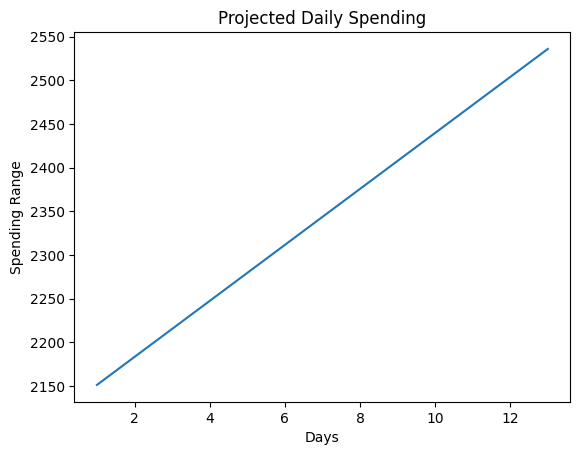

KeyboardInterrupt: Interrupted by user

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load the trained model
policy = torch.load('policy.pth')
variables = torch.load('pytorch_variables.pth')

# Function to predict daily budget
def predict_daily_budget(model, income, spending_goal, days_left, previous_data=None):
    # Calculate remaining budget after spending
    remaining_budget = income - sum(previous_data) if previous_data else income

    # Calculate daily budget range
    min_budget = (remaining_budget - spending_goal) / days_left
    max_budget = (remaining_budget - spending_goal / 2) / days_left

    return min_budget, max_budget

# Take inputs from user
monthly_income = float(input("Enter your monthly income: "))
has_previous_data = input("Do you have spending data for previous days? (yes/no): ").strip().lower()

previous_days_spending = []
if has_previous_data == 'yes':
    today = datetime.date.today()
    for i in range(1, today.day):
        spending = float(input(f"Enter spending for {today - datetime.timedelta(days=i)}: "))
        previous_days_spending.append(spending)

saving_goal = float(input("Enter the amount you want to save this month: "))

# Calculate days left in the month
days_left = datetime.date.today().replace(day=1).replace(month=datetime.date.today().month + 1) - datetime.date.today()

# Predict the daily budget
min_budget, max_budget = predict_daily_budget(policy, monthly_income, saving_goal, days_left.days, previous_days_spending)

# Display the budget range
print(f"To achieve your saving goal, you should spend between {min_budget:.2f} - {max_budget:.2f} per day.")

# Generate and show the graph
days = np.arange(1, days_left.days + 1)
spending_projection = np.linspace(min_budget, max_budget, days_left.days)
plt.plot(days, spending_projection)
plt.title("Projected Daily Spending")
plt.xlabel("Days")
plt.ylabel("Spending Range")
plt.show()

# Feedback mechanism
feedback = input("Was this budget range helpful? (yes/no): ").strip().lower()

# Store feedback for future retraining
feedback_data = {'feedback': feedback, 'income': monthly_income, 'saving_goal': saving_goal, 'min_budget': min_budget, 'max_budget': max_budget}
# Store feedback_data to a file or database for future use (this step is not implemented in the code)
